<a href="https://colab.research.google.com/github/Ashif-khan033/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **REGRESSION**    
##### **INDIVIDUAL/TEAM**    
##### **Mohd Ashif Khan**
##### **Mayank Belwal**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


A Rossmann is a private drug store chain based in Germany, with main operations on Europe. Operates over **3,000 drug stores in 7 different contries**. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for **1,115** Rossmann stores. The task is to forecast the **"Sales"** column for the test set. Note that some record stores in dataset were temporarily closed for renovations.


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Analyse the historical sales data for 1,115 Rossmann stores and build a machine learning model to forecast the sales of each Rossmann store upto 6 weeks.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_rossmann = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/Rossmann Stores Data.csv")
df_store = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/store.csv")

### Dataset First View

In [4]:
# Dataset First Look

In [5]:
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
# total number of rows in rossmann dataframe
num_of_rows = df_rossmann.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_rossmann.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1017209
Total no. of columns: 9


In [10]:
# total number of rows in store dataframe
num_of_rows = df_store.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_store.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1115
Total no. of columns: 10


### Dataset Information

In [11]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [13]:
# number of duplicate rows
num_of_dup_rows = df_rossmann.duplicated(["Store","Date"]).sum()
print(f"No. of duplicate rows: {num_of_dup_rows}")

No. of duplicate rows: 0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df_rossmann.isna().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The rossmann dataset does not contain null values but the store dataset have null values in dataset.So, we all deal theses null values in future.

In [16]:

# Visualizing the missing values
# define a function to find the number and percentage of missing values in a dataframe
df_null_store = pd.DataFrame((df_store.isna().sum()/df_store.shape[0])*100)
df_null_store["count"] = list(df_store.isna().sum().values)
df_null_store.rename(columns={0:"column"},inplace=True)
df_null_store.sort_values(by = ["count"],ascending = False)

,column,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


### What did you know about your dataset?

#####> Store dataframe contains 10 columns.
#####> Six columns have missing values.
#####>Four columns require conversion of datatypes.
#####Additionally, new columns need to be added from existing ones to make analysis easier

## ***2. Understanding Your Variables***

In [17]:

# Dataset Columns
list(df_rossmann.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [18]:
list(df_store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [19]:
# Dataset Describe

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
df_store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

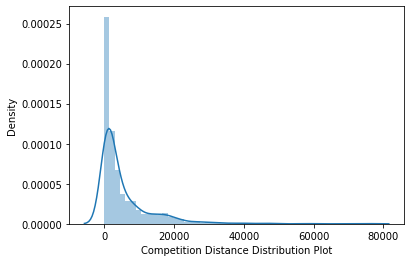

In [21]:
#CompetitionDistance is a numerical feature. Lets check its density plot to choose the value we need to impute missing values.

sns.distplot(x=df_store['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot');

######The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median.

In [22]:
#filling the missing values with median
df_store['CompetitionDistance'].fillna(value = int(df_store.CompetitionDistance.median()), inplace = True)

In [23]:
#filling the missing values with mode
df_store['CompetitionOpenSinceMonth'].fillna(value = df_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(value = df_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [24]:
# filling the missing values with value 0
df_store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_store["PromoInterval"].fillna(value = 0, inplace=True)

In [25]:
#again checking null values
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#####Now, no missing values in dataframe.We can proceed for further analyses.

In [26]:
# Write your code to make your dataset analysis ready.

# merging two dataframes on store column
df= df_rossmann.merge(right=df_store,how="left",on="Store")
df.head()

# Creating new column for Day , month and year for Date column
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

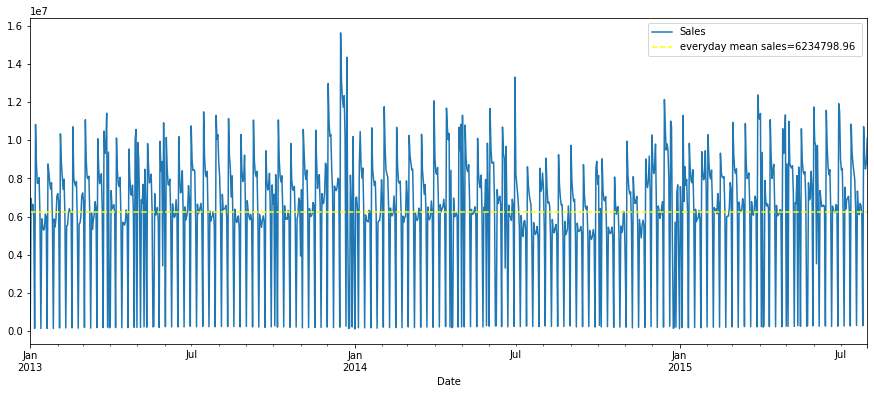

In [27]:
# Chart - 1 visualization code

#Visualizing everyday sales with average everyday sales 
fig, ax= plt.subplots(figsize=(15,6))

eday_sales=df.groupby(["Date"]).Sales.sum()
eday_sales.plot(kind="line",ax=ax)
plt.axhline(y=eday_sales.mean(), label=f"everyday mean sales={round(eday_sales.mean(),2)} ",color="yellow", linestyle="--")
plt.legend()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [28]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'day'],
      dtype='object')

#### Chart - 2

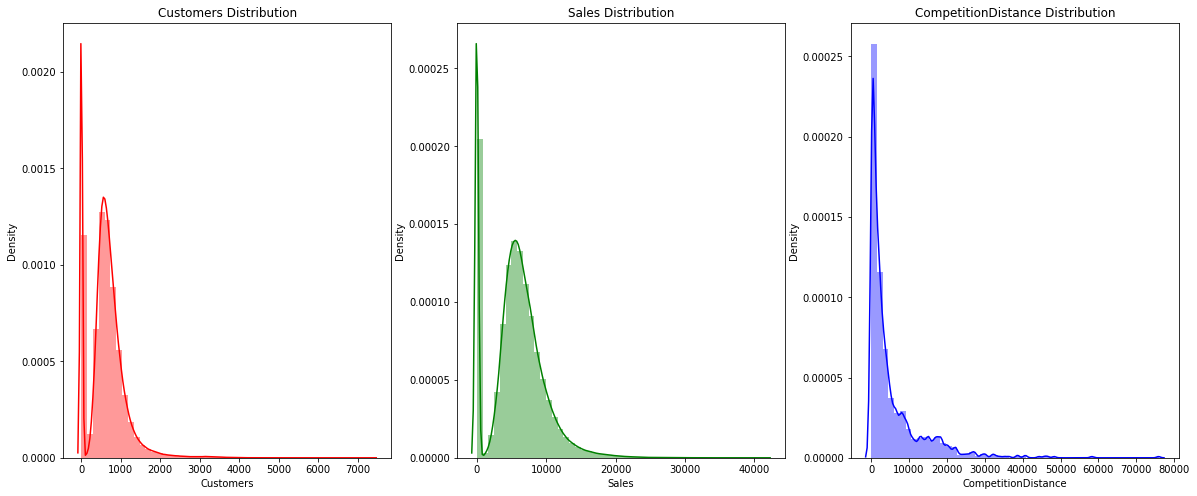

In [29]:
# Chart - 2 visualization code
cont = ['Customers','Sales',"CompetitionDistance"]
colors = ['red', 'green', 'blue']
fig, axs = plt.subplots(1, len(cont), figsize = (20, 8))
for c in range(len(cont)):
    sns.distplot(df[cont[c]], color = colors[c], ax = axs[c])
    axs[c].set_title(f'{cont[c]} Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [30]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [31]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [32]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [33]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [34]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [35]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [36]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [37]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [38]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [39]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [41]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [42]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

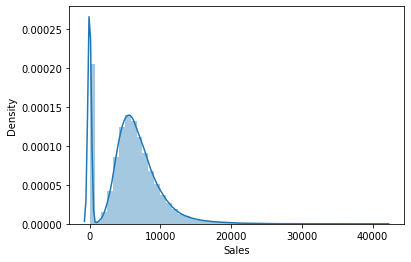

In [47]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
df1=df.copy()
sns.distplot(df1.Sales)
# will be removing rows with zero sales

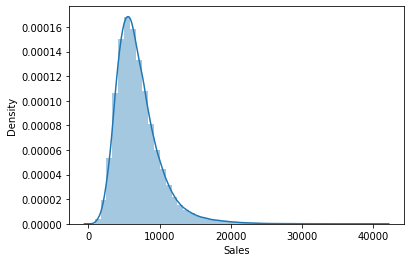

In [48]:
df1=df1[df1['Sales']!=0]
sns.distplot(df1.Sales)
# right skewed distribution, we will apply log transformation on slaes column

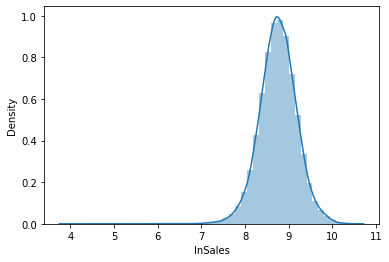

In [49]:
df1["lnSales"]=np.log(df1["Sales"])
sns.distplot(df1.lnSales)

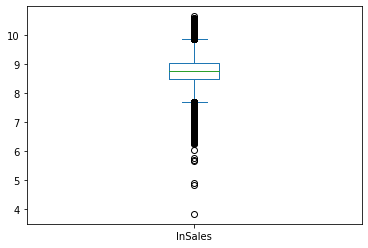

In [50]:
df1["lnSales"].plot(kind="box")

In [51]:
df1["lnSales"].describe()

count    844338.000000
mean          8.757564
std           0.425278
min           3.828641
25%           8.488588
50%           8.759198
75%           9.031214
max          10.634677
Name: lnSales, dtype: float64

In [52]:
# we will be treating data outside 3 standard deviation as outlier
sales_mean= round(df1["lnSales"].mean(),2)
sales_std=round(df1["lnSales"].std(),2)
sls_uprbnd=sales_mean+3*sales_std
df1[df1["lnSales"]>sls_uprbnd].shape
# df1[df1["lnSales"]>sls_uprbnd].shape[0]/df1["lnSales"].shape[0]
# df1[df1["lnSales"]>sls_uprbnd]["lnSales"].plot(kind="hist")
# sls_uprbnd

(1376, 22)

In [53]:
# checking how many times promotion was going on when stores had abnormally high sales 
df1[df1["lnSales"]>sls_uprbnd].Promo.value_counts()

1    994
0    382
Name: Promo, dtype: int64

This implies that promotion does have a impact on sales

In [54]:
# checking for reasons of abnormally high sales when no promotion was going on
temp=df1[(df1["lnSales"]>sls_uprbnd)] 
temp=temp[temp["Promo"]!=1]
for c in list(temp.columns):
 if c in ["Store","DayOfWeek","StoreType","CompetitionDistance","Month"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of Store
262     146
817      48
1114     39
842      20
756      18
251      15
586      12
523      10
513       7
562       7
Name: Store, dtype: int64
 Value counts of DayOfWeek
7    128
6     86
1     79
5     31
2     26
4     19
3     13
Name: DayOfWeek, dtype: int64
 Value counts of StoreType
a    176
b    153
c     28
d     25
Name: StoreType, dtype: int64
 Value counts of CompetitionDistance
1180.0    146
140.0      50
870.0      39
50.0       29
1200.0     20
340.0      15
250.0      15
400.0       7
1210.0      7
1130.0      6
Name: CompetitionDistance, dtype: int64
 Value counts of Month
12    124
5      49
6      31
4      30
2      26
11     25
3      24
1      21
7      17
10     15
Name: Month, dtype: int64


Upon Analysing the value counts for sales> sls_uprbnd and promotion not applied, we notice the following points:



*   High sales happened mostly in the case of December, in store type 'a' or 'b'
*   Also it happened most of the times when the Day of the week was Saturday(6),Sunday(7) or Monday(1)

So we will not be doing anything with the outliers , since they do not occur randomly.


In [55]:
sls_lwrbnd=sales_mean-3*sales_std
df1[df1["lnSales"]<sls_lwrbnd].shape
# df1[df1["lnSales"]>sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
# df1[df1["lnSales"]>sls_lwrbnd]["lnSales"].plot(kind="hist")

(3251, 22)

In [56]:
df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

0    3131
1     120
Name: Promo, dtype: int64

Again,Lower sales happen when no promotion was going on

In [57]:
# checking for reasons of abnormally low sales when promotion was going on
temp=df1[(df1["lnSales"]<sls_lwrbnd)] 
temp=temp[temp["Promo"]!=0]
for c in list(temp.columns):
 if c in ["SchoolHoliday","DayOfWeek","StoreType","CompetitionDistance","Month","StateHoliday"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of DayOfWeek
1    40
4    27
2    25
3    15
5    13
Name: DayOfWeek, dtype: int64
 Value counts of StateHoliday
0    93
0    21
a     6
Name: StateHoliday, dtype: int64
 Value counts of SchoolHoliday
0    109
1     11
Name: SchoolHoliday, dtype: int64
 Value counts of StoreType
a    86
c    18
d    11
b     5
Name: StoreType, dtype: int64
 Value counts of CompetitionDistance
360.0      26
11470.0     8
600.0       8
740.0       6
3640.0      5
620.0       4
250.0       4
26490.0     4
180.0       3
12430.0     3
Name: CompetitionDistance, dtype: int64
 Value counts of Month
2     39
3     33
1     29
6      8
10     4
8      2
5      1
7      1
12     1
11     1
Name: Month, dtype: int64


Upon Analysing the value counts for sales< sls_lwrbnd and promotion applied, we notice the following points:



*   Low sales have never happened on a Saturday or Sunday 
*   Also it happened most of the times in either 'a' or 'c' Store type or in the 1st quarter, i.e Jan, Feb , March.

So we will not be doing anything with the outliers , since they do not occur randomly.

In [58]:
sls_lwrbnd=sales_mean-3*sales_std
df1[df1["lnSales"]<sls_lwrbnd].shape
# df1[df1["lnSales"]>sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
# df1[df1["lnSales"]>sls_lwrbnd]["lnSales"].plot(kind="hist")

(3251, 22)

In [59]:
df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

0    3131
1     120
Name: Promo, dtype: int64

In [60]:
# df1.shape[1]
# len(df1)
# df1.head()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [61]:
# Encode your categorical columns
# Encode your categorical columns

# # 0 - not a state holiday; 1- is on a state holiday
# df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

df1["StateHoliday"].value_counts()

0    731308
0    112120
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [62]:
# Expand Contraction

#### 2. Lower Casing

In [63]:
# Lower Casing

#### 3. Removing Punctuations

In [64]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [65]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [66]:
# Remove Stopwords

In [67]:
# Remove White spaces

#### 6. Rephrase Text

In [68]:
# Rephrase Text

#### 7. Tokenization

In [69]:
# Tokenization

#### 8. Text Normalization

In [70]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [71]:
# POS Taging

#### 10. Text Vectorization

In [72]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

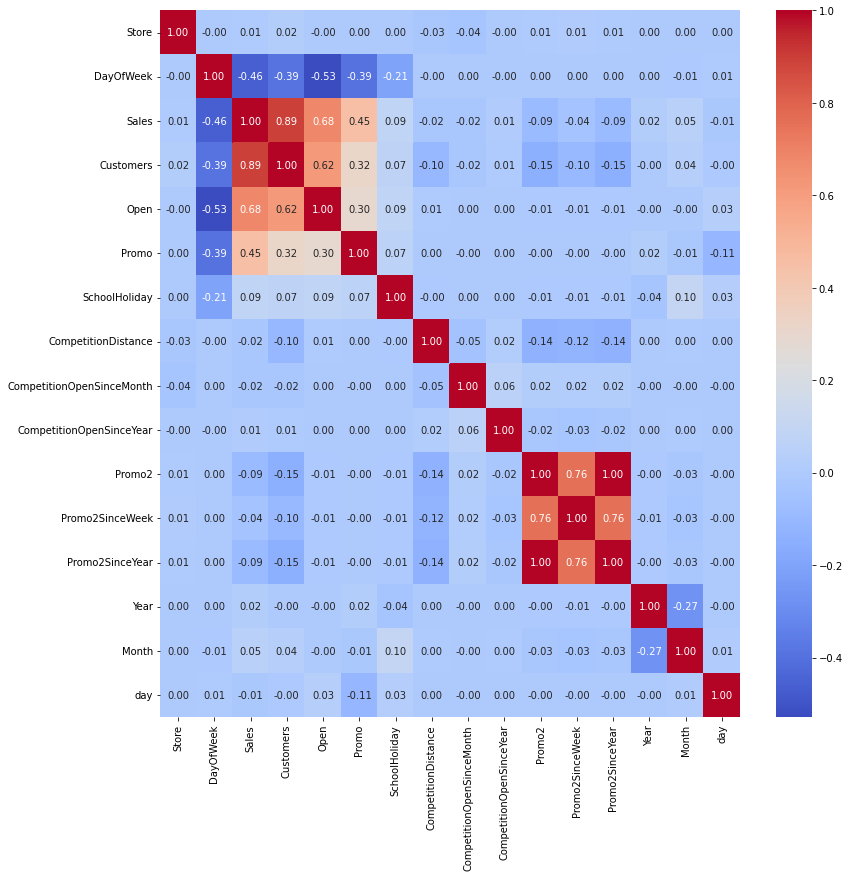

In [73]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation and create new features
corr_map=df.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".2f", cmap="coolwarm");

#### 2. Feature Selection

In [74]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [75]:
# Transform Your data

### 6. Data Scaling

In [76]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [77]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [78]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [79]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [80]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [83]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [85]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [88]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [89]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***